In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('Mall_Customers.csv')

In [3]:
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [4]:
df.drop(['CustomerID',	'Genre',	'Age'],axis=1,inplace=True)

In [5]:
df

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [6]:
df_array=df.values

In [7]:
import matplotlib.pyplot as plt

In [8]:
import seaborn as sns

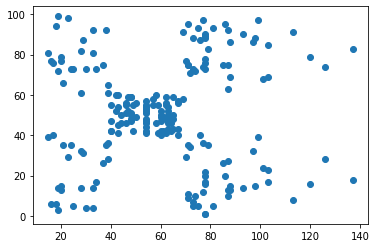

In [10]:
plt.scatter(df.values[:,0],df.values[:,1])

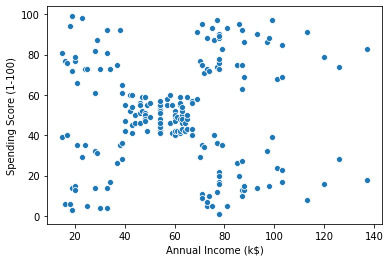

In [11]:
sns.scatterplot(x='Annual Income (k$)',y='Spending Score (1-100)',data=df)

In [12]:
from sklearn.cluster import KMeans


In [17]:
wcss=[]
for i in range (1 ,40):
    km=KMeans(n_clusters=i)
    km.fit(df)
    wcss.append(km.inertia_)


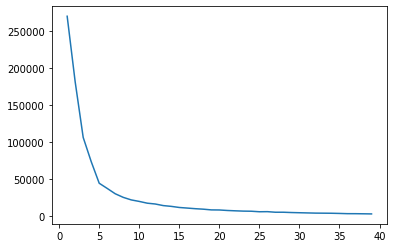

In [18]:
plt.plot(range(1,40),wcss)

In [19]:
km=KMeans(n_clusters=5)
km.fit(df)
km.inertia_


44448.45544793371

In [21]:
clusters=km.predict(df)

In [22]:
clusters

array([2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4,
       2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 1,
       2, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 3, 0, 1, 0, 3, 0, 3, 0,
       1, 0, 3, 0, 3, 0, 3, 0, 3, 0, 1, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0])

In [23]:
df['cluster']=clusters

In [24]:
df

,Annual Income (k$),Spending Score (1-100),cluster
0,15,39,2
1,15,81,4
2,16,6,2
3,16,77,4
4,17,40,2
...,...,...,...
195,120,79,0
196,126,28,3
197,126,74,0
198,137,18,3


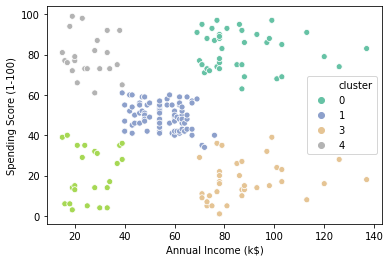

In [26]:
sns.scatterplot(x='Annual Income (k$)',y='Spending Score (1-100)',data=df,hue='cluster',palette='Set2')

In [28]:
d={0:'HI,HS',1:'MI,MS',3:'HI,LS',4:'LI,HS',2:'LI,LS'}

In [32]:
df['cluster']=df['cluster'].map(d)

In [34]:
df.head(2)

,Annual Income (k$),Spending Score (1-100),cluster
0,15,39,"LI,LS"
1,15,81,"LI,HS"
